In [1]:
import pandas as pd
###import helpers.data_mining_helpers as dmh
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
f=open(r'F:\資料\data mininng\sentiment labelled sentences\yelp_labelled.txt','r')
f1=open(r'F:\資料\data mininng\sentiment labelled sentences\imdb_labelled.txt','r',encoding="utf-8")
f2=open(r'F:\資料\data mininng\sentiment labelled sentences\amazon_cells_labelled.txt','r')

In [3]:
data=[]
for line in f.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]])
for line in f1.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]]) 
for line in f2.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]]) 

In [4]:
categories = ['negative', 'positive']
new_data=[]
for i in data:
    new_data.append([i[0],i[1],categories[int(i[1])]])
new_data=pd.DataFrame(new_data)
new_data.columns=["text","score","category"]

In [60]:
X=new_data
X.drop_duplicates(keep="first", inplace=True)

In [61]:
count_vect = CountVectorizer()
count_vect_P = CountVectorizer()
count_vect_N = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts_P = count_vect_P.fit_transform(X[X["score"]=="1"].text)
X_counts_N = count_vect_N.fit_transform(X[X["score"]=="0"].text)

In [7]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [8]:
count_total=pd.DataFrame(term_frequencies, columns = ['frequencies'],index=count_vect.get_feature_names_out())

In [63]:
count_total

,frequencies
00,1
10,36
100,3
11,2
12,4
...,...
z500a,1
zero,6
zillion,1
zombie,2


In [9]:
term_frequencies_P = [] ## count words in positive sentence
for j in range(0,X_counts_P.shape[1]):
    term_frequencies_P.append(sum(X_counts_P[:,j].toarray()))
term_frequencies_P = np.asarray(X_counts_P.sum(axis=0))[0]    

In [10]:
term_frequencies_N = [] ## count words in negtive sentence
for j in range(0,X_counts_N.shape[1]):
    term_frequencies_N.append(sum(X_counts_P[:,j].toarray()))
term_frequencies_N = np.asarray(X_counts_N.sum(axis=0))[0]       

In [11]:
count_total_P=pd.DataFrame(term_frequencies_P, columns = ['frequencies'],index=count_vect_P.get_feature_names_out())
count_total_N=pd.DataFrame(term_frequencies_N, columns = ['frequencies'],index=count_vect_N.get_feature_names_out())

In [12]:
count_total_final=pd.concat([count_total,count_total_P,count_total_N],axis=1) 

In [13]:
count_total_final.fillna(0,inplace=True)## because some words are not in positive sentence or negtive sentence 
## dataframe will have some NaN  and it also means zero so change Nan to zero

In [14]:
count_total_final.columns=["frequencies","positive_times","negative_times"]

In [15]:
count_total_final=count_total_final.astype(int)

<AxesSubplot:title={'center':'compare P and N'}>

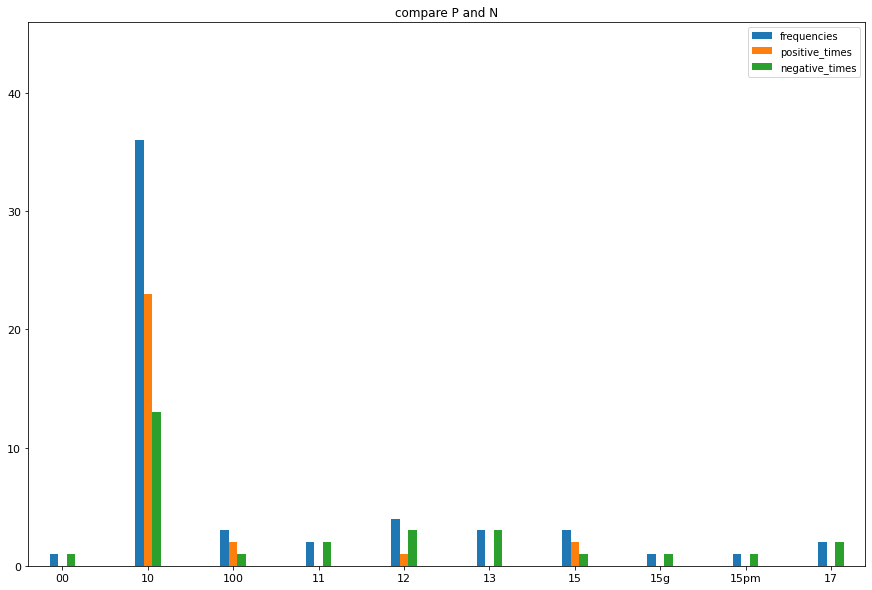

In [104]:
ylim=max(count_total_final["frequencies"][:10])
count_total_final[:10].plot(kind = 'bar',title = 'compare P and N',ylim = [0, ylim+10],rot = 0, fontsize = 11, figsize = (15,10),width=0.3)

<AxesSubplot:title={'center':'compare P and N'}>

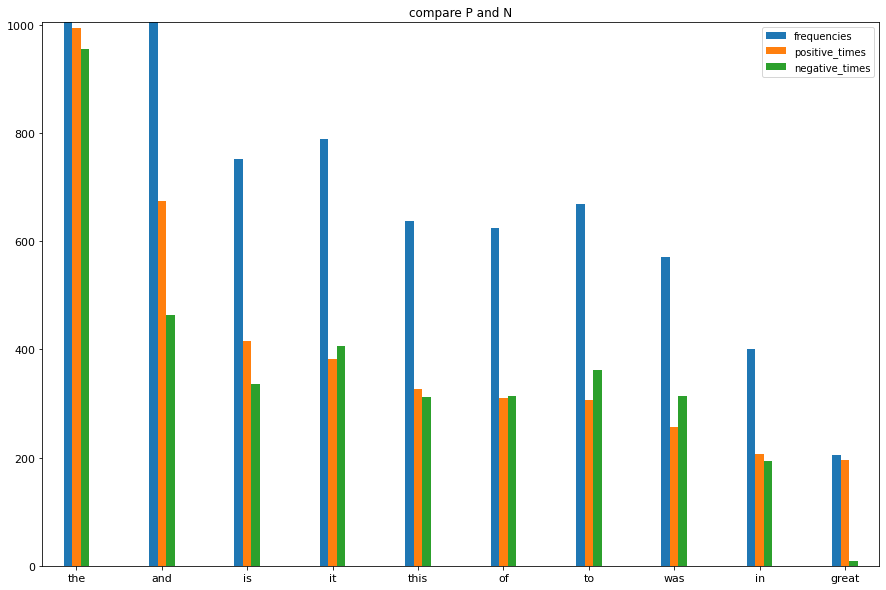

In [111]:
p=count_total_final.sort_values(by=['positive_times'],ascending=False)
ylim=max(p["positive_times"][:10])
p[:10].plot(kind = 'bar',title = 'compare P and N',ylim = [0, ylim+10],rot = 0, fontsize = 11, figsize = (15,10),width=0.3)

we almost can't observe something because higher positive_times actually higher negative_times

<AxesSubplot:title={'center':'compare P and N'}>

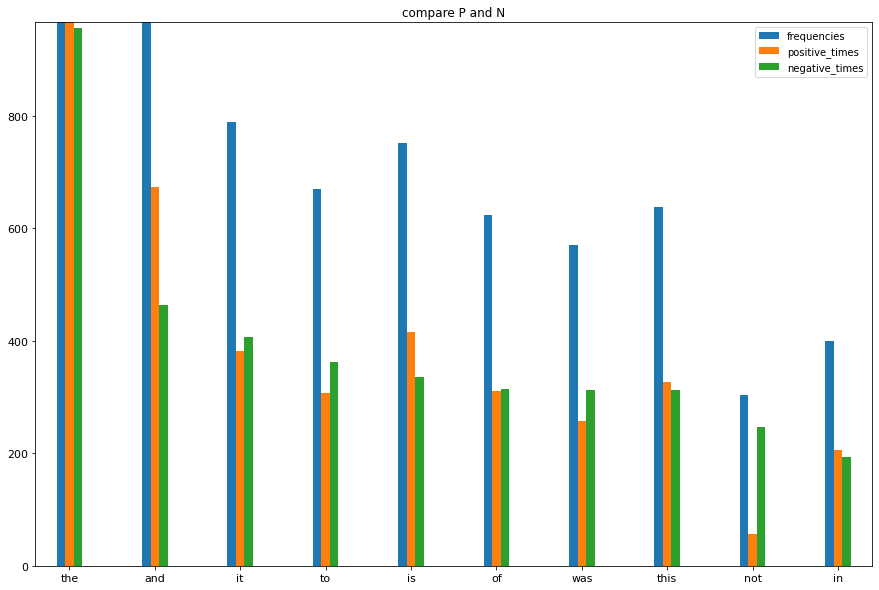

In [114]:
n=count_total_final.sort_values(by=['negative_times'],ascending=False)
ylim=max(n["negative_times"][:10])
n[:10].plot(kind = 'bar',title = 'compare P and N',ylim = [0, ylim+10],rot = 0, fontsize = 11, figsize = (15,10),width=0.3)

almost like last result

In [16]:
count_total_final["P-N"]=count_total_final['positive_times']-count_total_final['negative_times']

In [17]:
count_total_final["N-P"]=count_total_final['negative_times']-count_total_final['positive_times']## i am so stupid i just need to set minus count_total_final["P-N"] 

so maybe i should find some way to get useful data visualization

<AxesSubplot:title={'center':'compare P and N'}>

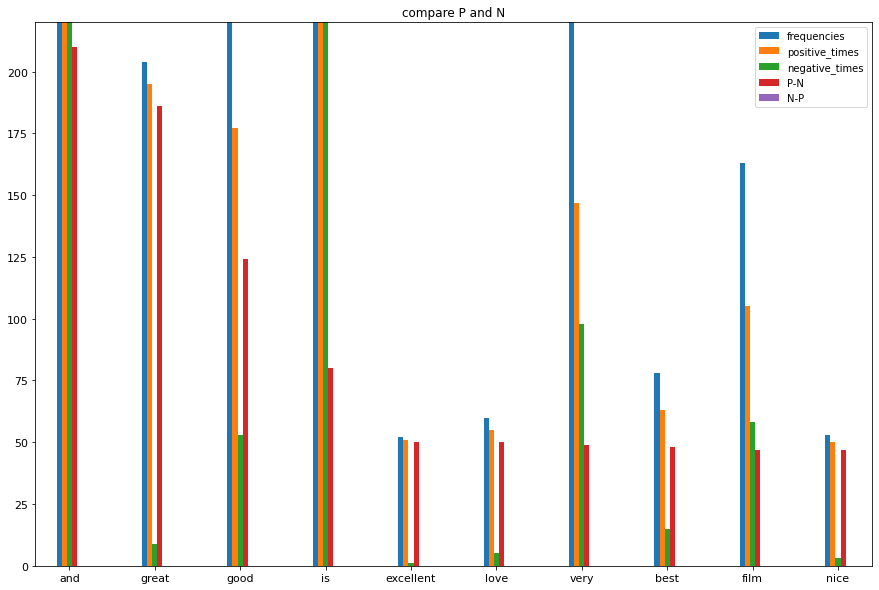

In [118]:
p=count_total_final.sort_values(by=['P-N'],ascending=False)
ylim=max(p["P-N"][:10])
p[:10].plot(kind = 'bar',title = 'compare P and N',ylim = [0, ylim+10],rot = 0, fontsize = 11, figsize = (15,10),width=0.3)

i find the way to visualize data that is useful (use positive_times substact negative_times)  
and find something interesting => maybe people give positive evaluation usually not only say one place is good but also say  
those place are good  
and others words can be expected  


<AxesSubplot:title={'center':'compare P and N'}>

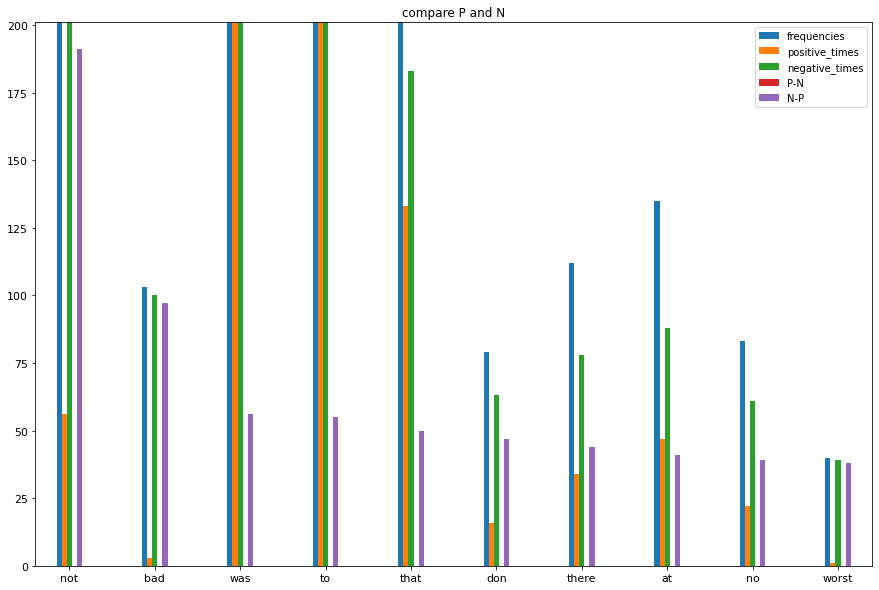

In [121]:
n=count_total_final.sort_values(by=['N-P'],ascending=False)
ylim=max(n["N-P"][:10])
n[:10].plot(kind = 'bar',title = 'compare P and N',ylim = [0, ylim+10],rot = 0, fontsize = 11, figsize = (15,10),width=0.3)

compare with last result maybe my guest is right   
because i find those words => that there at   
it exactly talking about which place is not good enough

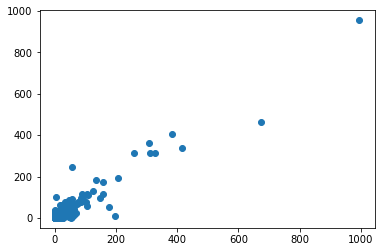

In [25]:
plt.scatter(count_total_final["positive_times"],count_total_final["negative_times"])
plt.show()

i think i just need to care about outlier which close to x-axis or y-axis  
others are almost useful data

### TF-IDF features

In [9]:
Tfid_fVect=TfidfVectorizer()
X = Tfid_fVect.fit_transform(X.text)

In [35]:
Tfid_fVect.get_feature_names_out()[416]

'be'

In [28]:
X[400:420,400:420].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2277251 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [34]:
new_data.text[402]

"I don't have to be an accountant to know I'm getting screwed!"

In [36]:
analyze = Tfid_fVect.build_analyzer()
analyze(new_data.text[402])##tf(i,j) * idf(i)

['don',
 'have',
 'to',
 'be',
 'an',
 'accountant',
 'to',
 'know',
 'getting',
 'screwed']

### Naive Bayes classifier

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

##### use TF-IDF features to build classifiers

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X.toarray(), new_data.score, test_size=0.25)

In [46]:
gnb = GaussianNB()

In [47]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [48]:
Y_gnb_score = gnb.predict_proba(X_test)

In [49]:
Y_gnb_score

array([[1.00000000e+000, 1.74063152e-309],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       ...,
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000]])

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [57]:
y_pred = gnb.predict(X_test)
score1 =metrics.accuracy_score(Y_test, y_pred)
print("accuracy:   %0.3f" % score1)

accuracy:   0.673


In [58]:
print(metrics.classification_report(Y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.65      0.80      0.72       384
    Negative       0.72      0.53      0.61       362

    accuracy                           0.67       746
   macro avg       0.68      0.67      0.66       746
weighted avg       0.68      0.67      0.67       746

confusion matrix:
[[309  75]
 [169 193]]


##### use word frequency features to build classifiers

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_counts.toarray(), new_data.score, test_size=0.25)

In [64]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [65]:
y_pred = gnb.predict(X_test)
score1 =metrics.accuracy_score(Y_test, y_pred)
print("accuracy:   %0.3f" % score1)

accuracy:   0.677


In [66]:
print(metrics.classification_report(Y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.63      0.89      0.74       379
    Negative       0.81      0.45      0.58       367

    accuracy                           0.68       746
   macro avg       0.72      0.67      0.66       746
weighted avg       0.72      0.68      0.66       746

confusion matrix:
[[339  40]
 [201 166]]


just look at result there are almost nothing diffirent  
but look at negative turn  neither two models  are not good at negative turn  
model two(word frequency) is worse than model one even it's accuracy better  
so somthing can improve is let negtive turn accuracy higher 